In [11]:
import numpy as np
from sklearn.covariance import ShrunkCovariance
from sklearn.datasets import make_gaussian_quantiles
real_cov = np.array([[0.6, .2],[.2, 0.3]])
rng = np.random.RandomState(1)
X = rng.multivariate_normal(mean=[0, 0], cov=real_cov, size=500)
cov = ShrunkCovariance(shrinkage = 0.0).fit(X)
print(cov.covariance_)
print(cov.location_)


[[0.55340343 0.20453272]
 [0.20453272 0.30872951]]
[-0.04116765 -0.00515379]


In [9]:
np.cov(X.T)*499/500,empirical_covariance(X)

(array([[0.55340343, 0.20453272],
        [0.20453272, 0.30872951]]),
 array([[0.55340343, 0.20453272],
        [0.20453272, 0.30872951]]))

In [26]:
n_features, n_samples = 100, 400
np.random.seed(42)
base_X_train = np.random.normal(size=(n_samples, n_features))
base_X_test = np.random.normal(size=(n_samples, n_features))

# Color samples
coloring_matrix = np.random.normal(size=(n_features, n_features))
X_train = np.dot(base_X_train, coloring_matrix)
X_test = np.dot(base_X_test, coloring_matrix)

In [27]:
from sklearn.covariance import ShrunkCovariance, empirical_covariance, log_likelihood
from scipy import linalg
# spanning a range of possible shrinkage coefficient values
shrinkages = np.logspace(-4, 0, 50)
negative_logliks = [
    -ShrunkCovariance(shrinkage=s).fit(X_train).score(X_test) for s in shrinkages
]
# under the ground-truth model, which we would not have access to in real
# settings
real_cov = np.dot(coloring_matrix.T, coloring_matrix)
emp_cov = empirical_covariance(X_train)
loglik_real = -log_likelihood(emp_cov, linalg.inv(real_cov))

In [23]:
cv.best_estimator_

ShrunkCovariance(shrinkage=0.0001)

In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.covariance import LedoitWolf, OAS

# GridSearch for an optimal shrinkage coefficient
tuned_parameters = [{"shrinkage": shrinkages}]
cv = GridSearchCV(ShrunkCovariance(), tuned_parameters)
cv.fit(X_train)

# Ledoit-Wolf optimal shrinkage coefficient estimate
lw = LedoitWolf()
loglik_lw = lw.fit(X_train).score(X_test)

# OAS coefficient estimate
oa = OAS()
loglik_oa = oa.fit(X_train).score(X_test)


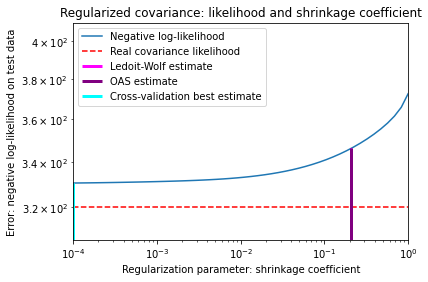

In [29]:
import matplotlib.pyplot as plt

fig = plt.figure()
plt.title("Regularized covariance: likelihood and shrinkage coefficient")
plt.xlabel("Regularization parameter: shrinkage coefficient")
plt.ylabel("Error: negative log-likelihood on test data")
# range shrinkage curve
plt.loglog(shrinkages, negative_logliks, label="Negative log-likelihood")

plt.plot(plt.xlim(), 2 * [loglik_real], "--r", label="Real covariance likelihood")

# adjust view
lik_max = np.amax(negative_logliks)
lik_min = np.amin(negative_logliks)
ymin = lik_min - 6.0 * np.log((plt.ylim()[1] - plt.ylim()[0]))
ymax = lik_max + 10.0 * np.log(lik_max - lik_min)
xmin = shrinkages[0]
xmax = shrinkages[-1]
# LW likelihood
plt.vlines(
    lw.shrinkage_,
    ymin,
    -loglik_lw,
    color="magenta",
    linewidth=3,
    label="Ledoit-Wolf estimate",
)
# OAS likelihood
plt.vlines(
    oa.shrinkage_, ymin, -loglik_oa, color="purple", linewidth=3, label="OAS estimate"
)
# best CV estimator likelihood
plt.vlines(
    cv.best_estimator_.shrinkage,
    ymin,
    -cv.best_estimator_.score(X_test),
    color="cyan",
    linewidth=3,
    label="Cross-validation best estimate",
)

plt.ylim(ymin, ymax)
plt.xlim(xmin, xmax)
plt.legend()

plt.show()